In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import math
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Lab cleaning numerical data

In [43]:
# import data
data = pd.read_csv('C:/Users/Anne_2/Documents/Ironhack/Python CustomerAnalysis/2/lab-cleaning-numerical-data-master/lab-cleaning-numerical-data-master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.shape

(9134, 24)

In [44]:
#Standardize header names:
data.columns=[i.lower().replace(' ', '_') for i in data.columns]

In [45]:
# Change effective to date column to datetime format
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

In [8]:
# check for duplicates
data.customer.duplicated().sum()

0

In [47]:
# Define a function that differentiates between continuous and discrete variables.
def variable_cat(data):
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            if data[column].nunique() > 100:
                data[column] = data[column].astype('float64')
            else:
                data[column] = data[column].astype('int64')
    return data.info()

In [48]:
# calling the function - changed income and monthly_premium_auto into float64
variable_cat(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   float64       
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [49]:
# Store continuous data into a continuous variable and do the same for discrete and categorical
continuous = data.select_dtypes('float64')
discrete = data.select_dtypes('int64')
categorical = data.select_dtypes('object').drop('customer', axis = 1) # categorical data, dropping customer id

In [12]:
# For the categorical data, check if there is some kind of text in a variable so we would need to clean it.
for i in categorical.columns:
    print(data[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


### --> no cleaning necessary, all categories are okay

In [30]:
# function for splitting the data by data type (instead of using select_dtypes)
def split_data(df):
    disc = []
    cont = []
    cat = []
    for column in df:
        if df[column].dtype == 'int64':
            disc.append(column)
        elif df[column].dtype == 'float64':
            cont.append(column)
        else:
            cat.append(column)
    return df[disc], df[cont], df[cat]

In [31]:
discrete, continuous, categorical = split_data(data)

In [50]:
discrete

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [51]:
continuous

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274.0,69.0,384.811147
1,6979.535903,0.0,94.0,1131.464935
2,12887.431650,48767.0,108.0,566.472247
3,7645.861827,0.0,106.0,529.881344
4,2813.692575,43836.0,73.0,138.130879
...,...,...,...,...
9129,23405.987980,71941.0,73.0,198.234764
9130,3096.511217,21604.0,79.0,379.200000
9131,8163.890428,0.0,85.0,790.784983
9132,7524.442436,21941.0,96.0,691.200000


In [52]:
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
# dropping the customer id (again)
categorical = categorical.drop('customer', axis = 1)

# Lab cleaning categorical data

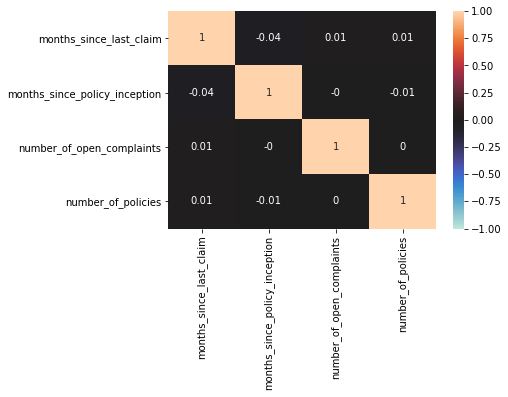

In [13]:
# Plot a correlation matrix, what can you see?

# correlation matrix for discrete data
ax = sns.heatmap(round(discrete.corr(), 2), vmin=-1, vmax=1, center = 0, annot = True, annot_kws = {'size': 10})
plt.show()

### --> no relevant correlation between discrete features

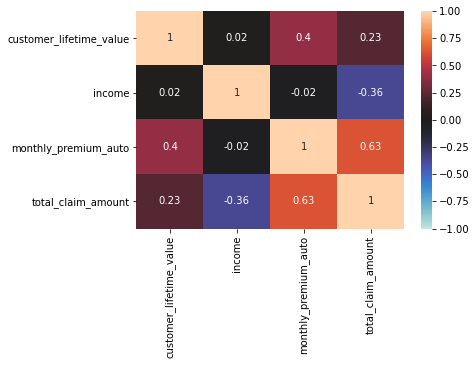

In [14]:
# correlation between continuous features
ax = sns.heatmap(round(continuous.corr(), 2), vmin= -1, vmax = 1, center = 0, annot = True, annot_kws = {'size':10})
plt.show()

### --> total_claim_amount is strongly correlated to monthly_auto_premium, and correlated negatively to income and moderate positively to customer_lifetime_value. Furthermore customer_lifetime_value and monthly_premium_auto are positively correlated.

In [53]:
# Create a function to plot every discrete variable.
def plot_discrete(df):
    for column in df:
        plt.hist(df[column], bins = df[column].nunique())
        plt.title(column)
        plt.ylabel('frequency')
        plt.show()

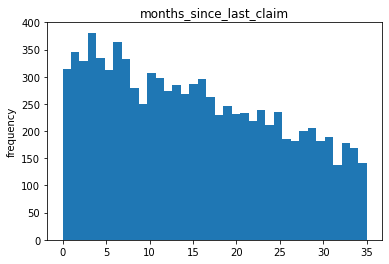

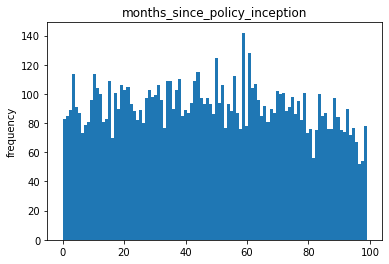

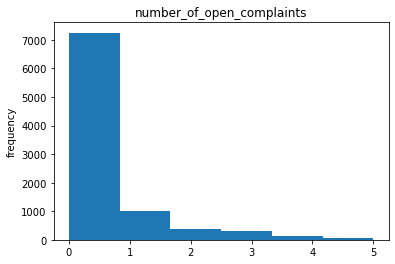

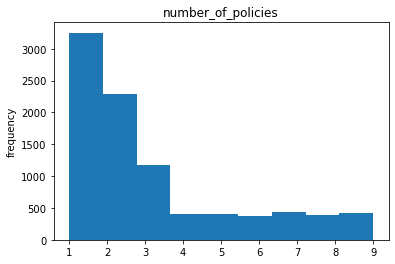

In [16]:
# calling the function
plot_discrete(discrete)

In [17]:
# Create a function to plot every discrete variable as subplots
def subplots_frequency(data):
    
    fig, axs = plt.subplots(math.ceil(len(data.columns)/2), 2)
    fig.tight_layout()
    a = 0
    b = 0

    for column in data:
        axs[a, b].hist(data[column], bins = data[column].nunique())
        axs[a, b].set_title(column)
        axs[a, b].set_ylabel('frequency')
        if b == 0:
            b += 1
        else:
            a += 1
            b = 0

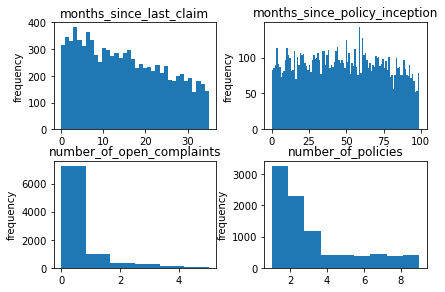

In [18]:
# call the subplot function for discrete data
subplots_frequency(discrete)

In [19]:
# Do the same with continuous variables
def subplots_kdeplot(data):
    
    fig, axs = plt.subplots(math.ceil(len(data.columns)/2), 2, figsize=(8,4))
    fig.tight_layout()
    a = 0
    b = 0

    for column in data:
        sns.kdeplot(x = data[column], ax =  axs[a, b])
        if b == 0:
            b += 1
        else:
            a += 1
            b = 0   

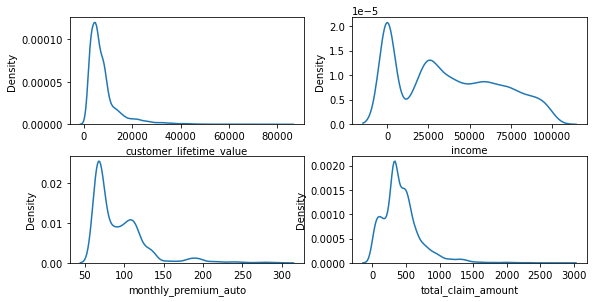

In [20]:
# call the function for continuous data
subplots_kdeplot(continuous)

#### --> none of the features are normally distributed, except for months_since_policy_inception, all distributions are left skewed.

In [54]:
# Looking for outliers (using boxplots)

def subplots_boxplot(data):
    
    fig, axs = plt.subplots(math.ceil(len(data.columns)/2), 2, figsize=(8,4))
    fig.tight_layout()
    a = 0
    b = 0

    for column in data:
        sns.boxplot(x = data[column], ax =  axs[a, b])
        if b == 0:
            b += 1
        else:
            a += 1
            b = 0   

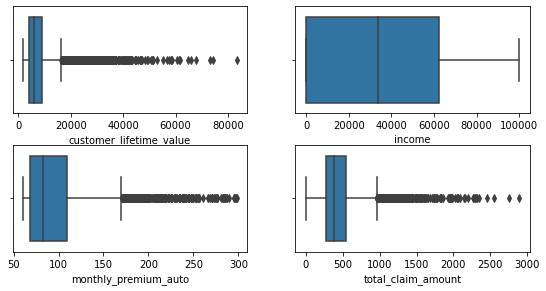

In [55]:
# call the function for continuous data
subplots_boxplot(continuous)

# Lab Feature extraction

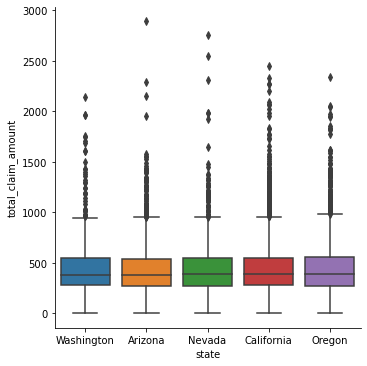

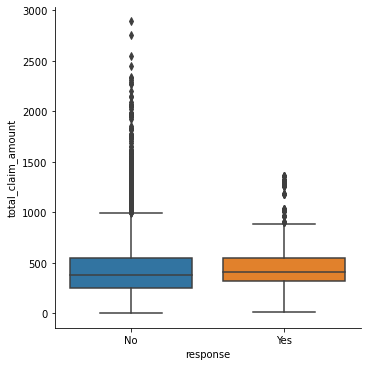

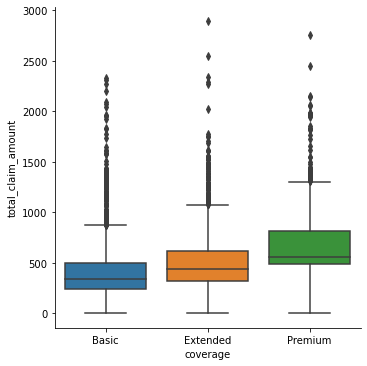

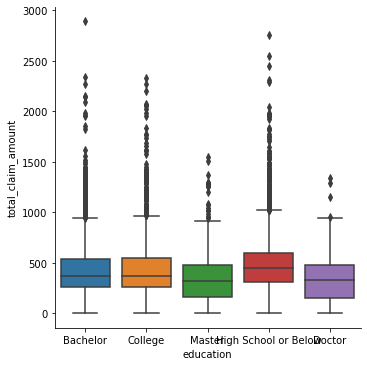

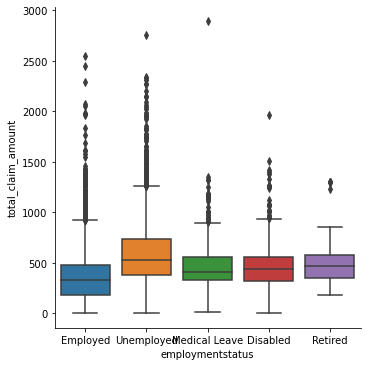

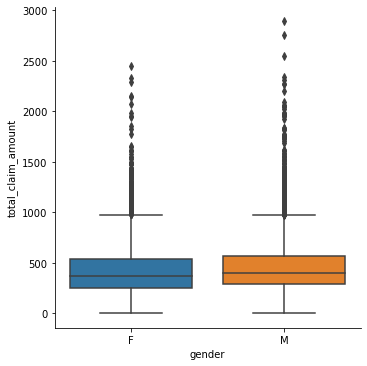

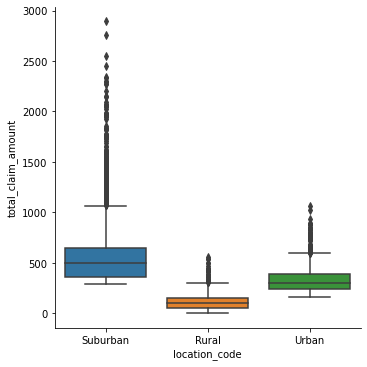

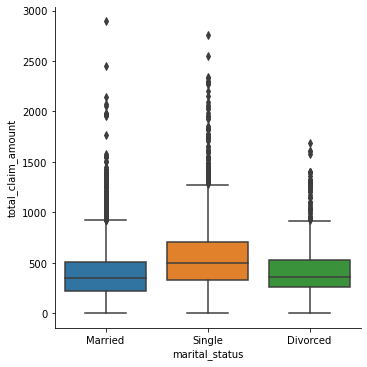

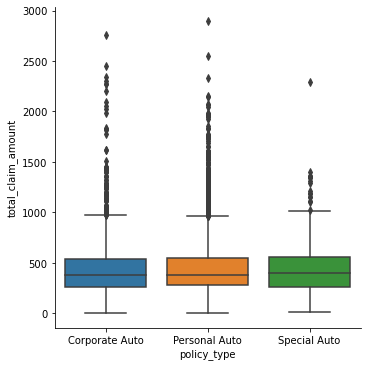

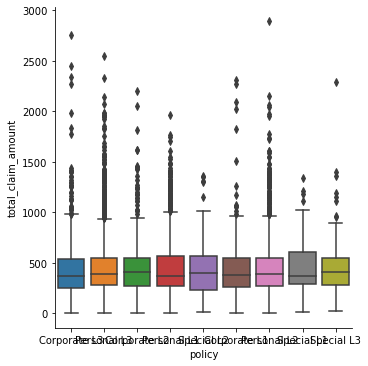

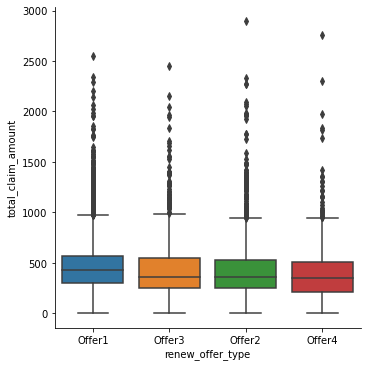

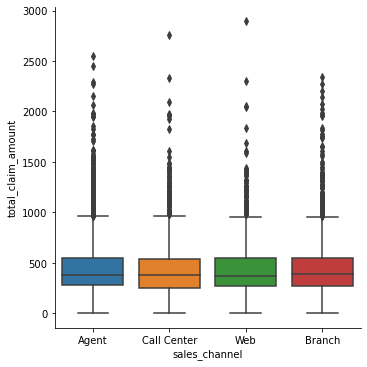

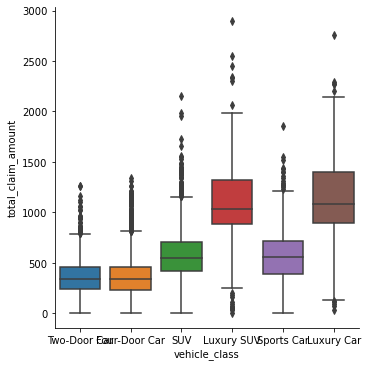

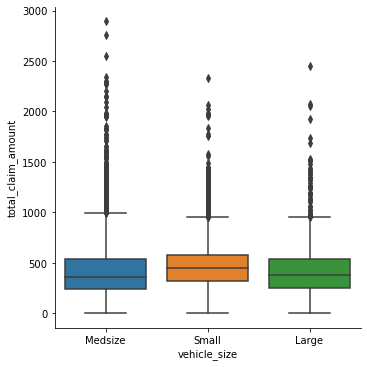

In [56]:
# Plot all the categorical variables with the proper plot.

# 1. For feature extraction, deciding which one is important for my model, using boxplot against the target
for i in categorical.columns:
    sns.catplot(x=i, y='total_claim_amount', kind='box', data=data)
    plt.show()

### --> Target does not seem to differ (much) in variables: state, response, gender, policy_type, policy, sales channel, vehicle_size
### --> Variables that seem to be correlated with target: coverage, education, employmentstatus, location_code, marital_status, renew offer type, vehicle_class, 


In [24]:
# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

# policy and policy_type seem to be redundant - checking with crosstab
pd.crosstab(data['policy_type'], data['policy'])

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


### --> if policy is relevant for a model, than only one of the columns should be used. Depending on relationship with target, if all information needed is provided by policy_type, than using policy only, if more detailed split into policy is useful, than using policy. 

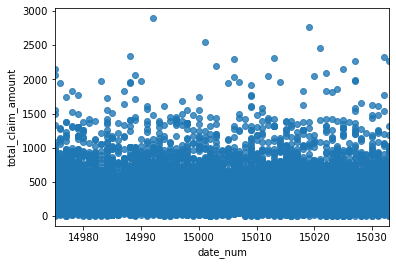

In [25]:
# Plot time variable. Can you extract something from it?
data['date_num'] = matplotlib.dates.date2num(data['effective_to_date'])
sns.regplot(x = data['date_num'], y = data['total_claim_amount'])
plt.show()

### --> does not seem to be relevant, very uniformely distributed

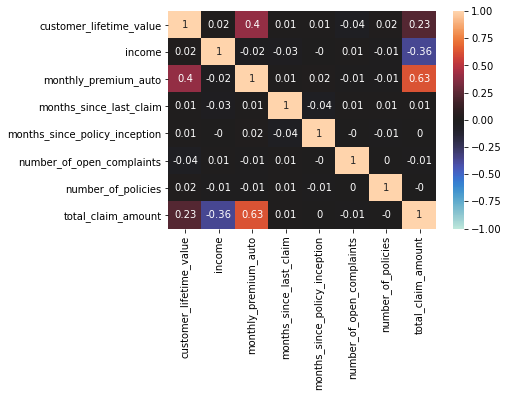

In [112]:
# Checking relevance of numerical data using correlation

numerical = data.select_dtypes(np.number)
ax = sns.heatmap(round(numerical.corr(), 2), vmin= -1, vmax = 1, center = 0, annot = True, annot_kws = {'size':10})
plt.show()

### --> correlation only with continuos variables customer_liefetime_value, income, monthly_premium_auto
### --> because of correlation between features clv and monthly premium, clv will also be dropped

# Lab Data Cleaning and Wrangling

In [137]:
# Create a copy of the dataframe for the data wrangling
df = data

In [138]:
# remove outliers from continuous data (clv, monthly premium and claim amount)
def remove_outliers(data, column):
    print('Before removal: ', data.shape)
    iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    lower_boundary = np.percentile(data[column], 25) - iqr*1.5
    upper_boundary = np.percentile(data[column], 75) + iqr*1.5
    data = data[(data[column]>lower_boundary)&(data[column]<upper_boundary)]
    print('After removal: ', data.shape)
    return data.reset_index(drop=True)

In [139]:
# 1. removing outliers from customer_lifetime_value
df = remove_outliers(df, 'customer_lifetime_value')

Before removal:  (9134, 24)
After removal:  (8317, 24)


In [140]:
# 2. removing outliers from monthly_premium_auto
df = remove_outliers(df, 'monthly_premium_auto')

Before removal:  (8317, 24)
After removal:  (8016, 24)


In [141]:
# 3. removing outliers from total_claim_amount
df = remove_outliers(df, 'total_claim_amount')

Before removal:  (8016, 24)
After removal:  (7789, 24)


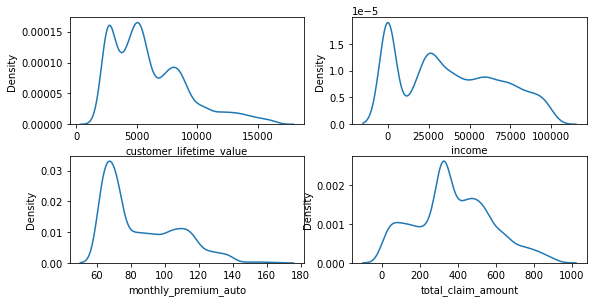

In [142]:
# 4. check the distributions after removing outliers
continuous = df.select_dtypes('float64')
subplots_kdeplot(continuous)

### --> clv, income and monthly_premium_auto are still quite left skewed

In [143]:
# Normalize the continuous variables - Boxcox transformation
# 1. checking the range (boxcox takes only strictly positive values)
continuous.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,7789.000000,7789.000000,7789.000000,7789.000000
mean,6082.742116,38576.873411,85.863525,379.176161
std,3115.799233,30335.191073,21.702386,200.232910
min,1898.007675,0.000000,61.000000,0.099007
25%,3614.078436,12160.000000,68.000000,253.183568
50%,5332.615013,35011.000000,78.000000,355.200000
75%,8005.964669,62902.000000,103.000000,513.600000
max,16407.664610,99981.000000,165.000000,922.335972


In [144]:
# 2. Income has values starting with 0/no income --> recoding to 0.000001 to make them strictly positive
df['income'] = np.where(df['income'] == 0, 0.000001, df['income'])

In [145]:
# 3. boxcox transformation of continuous variables (but not of target)
df['income_bc'], income_lambda = stats.boxcox(df['income'])
df['customer_lifetime_value_bc'], mpa_lambda = stats.boxcox(df['customer_lifetime_value'])
df['monthly_premium_auto_bc'], mpa_lambda = stats.boxcox(df['monthly_premium_auto'])

In [146]:
mpa_lambda

-1.3810653984798533

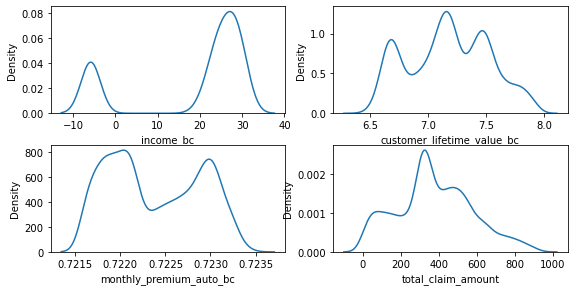

In [147]:
# 4. checking distribution after transformation
continuous = df[['income_bc', 'customer_lifetime_value_bc', 'monthly_premium_auto_bc', 'total_claim_amount']]
subplots_kdeplot(continuous)

In [148]:
# Encode the categorical variables
# Only encoding the ones, that are relevant (see feature extraxtion lab:
# Variables that seem to be correlated with target:
# coverage, education, employmentstatus, location_code, marital_status, renew offer type, vehicle_class)

categorical = df[['coverage', 'education', 'employmentstatus',
       'location_code', 'marital_status',
       'renew_offer_type', 'vehicle_class']]
categorical.columns

Index(['coverage', 'education', 'employmentstatus', 'location_code',
       'marital_status', 'renew_offer_type', 'vehicle_class'],
      dtype='object')

In [151]:
# 1. Encoding ordinal data with ordinal encoder (coverage, education, location_code)

df["coverage"] = df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
df["education"] = df["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
df["location_code"] = df["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2 })

In [154]:
# 2- Encoding nominal with get dummies
nominal = df[['employmentstatus','marital_status',
       'renew_offer_type', 'vehicle_class']]
nominal_binary = pd.get_dummies(data=nominal, columns=nominal.columns, drop_first=True)
df=df.join(nominal_binary)

In [155]:
# The time variable can be useful. Try to transform its data into a useful one.
# Hint: Day week and month as integers might be useful.
df['month'] = df['effective_to_date'].dt.month
print(df['month'].value_counts())
df['day'] = df['effective_to_date'].dt.weekday
print(df['day'].value_counts())

1    4166
2    3623
Name: month, dtype: int64
0    1309
5    1178
6    1137
3    1083
4    1064
2    1042
1     976
Name: day, dtype: int64


In [156]:
# Check and make sure that every column is numerical
df.dtypes

customer                                  object
state                                     object
customer_lifetime_value                  float64
response                                  object
coverage                                   int64
education                                  int64
effective_to_date                 datetime64[ns]
employmentstatus                          object
gender                                    object
income                                   float64
location_code                              int64
marital_status                            object
monthly_premium_auto                     float64
months_since_last_claim                    int64
months_since_policy_inception              int64
number_of_open_complaints                  int64
number_of_policies                         int64
policy_type                               object
policy                                    object
renew_offer_type                          object
sales_channel       

In [157]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'income_bc',
       'customer_lifetime_value_bc', 'monthly_premium_auto_bc',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed',
       'marital_status_Married', 'marital_status_Single',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car', 'month',
       'day'],
      dtype='object')

# Lab Comparing Regression Models

In [222]:
# create dataframe with only relevant data for model
model_data = df[['total_claim_amount', 'income_bc', 'monthly_premium_auto_bc',
       'coverage', 'education', 'location_code',          
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed',
       'marital_status_Married', 'marital_status_Single',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car']]

In [223]:
# X-y split
X = model_data.drop(['total_claim_amount'], axis = 1)
y = model_data['total_claim_amount']

In [224]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [225]:
# Standardizing numericals
X_train_num = X_train[['income_bc', 'monthly_premium_auto_bc']]
X_test_num = X_test[['income_bc', 'monthly_premium_auto_bc']]

scaler = StandardScaler().fit(X_train_num)
X_train_standard = scaler.transform(X_train_num)
X_test_standard = scaler.transform(X_test_num)

In [226]:
# rejoin with categoricals_
X_train_cat = X_train.drop(['income_bc', 'monthly_premium_auto_bc'], axis = 1).reset_index()
X_test_cat = X_test.drop(['income_bc', 'monthly_premium_auto_bc'], axis = 1).reset_index()

In [227]:
X_train_standard = pd.DataFrame(X_train_standard, columns =['income_bc', 'monthly_premium_auto_bc'])
X_test_standard = pd.DataFrame(X_test_standard, columns =['income_bc', 'monthly_premium_auto_bc'])

In [228]:
X_train = pd.concat([X_train_standard, X_train_cat], axis = 1)
X_test = pd.concat([X_test_standard, X_test_cat], axis = 1)

In [232]:
# 2. Linear Regression
linearR = LinearRegression()
model_linearR = linearR.fit(X_train, y_train)
score_linearR = linearR.score(X_test, y_test)
score_linearR

0.49819764075584505

In [240]:
# 3. Define a function to test different models
def build_model(X_train, X_test, y_train, y_test, methods):
    for i in methods:
        model = i()
        model_i = model.fit(X_train, y_train)
        model_score = model.score(X_test, y_test)
        print('Score of', i, ':', model_score)

In [244]:
# 4 + 5. Apply function
build_model(X_train, X_test, y_train, y_test, [LinearRegression, KNeighborsRegressor, MLPRegressor])

Score of <class 'sklearn.linear_model._base.LinearRegression'> : 0.49819764075584505
Score of <class 'sklearn.neighbors._regression.KNeighborsRegressor'> : -0.13822144852531393
Score of <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> : 0.4550457521355914
